# Урок 8. Видеоурок. Обучение без учителя.

## Тема “Обучение без учителя”

In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
rc_params = {'figure.figsize': [11, 6], 'lines.linewidth': 2.5}
matplotlib.rcParams.update(rc_params) 

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.3, rc=rc_params)

### Задание 1

Импортируйте библиотеки pandas и numpy.

In [2]:
import numpy as np
import pandas as pd

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["price"])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочных данных с параметрами: `n_components=2, learning_rate=250, random_state=42`. Постройте диаграмму рассеяния на этих данных.

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

In [10]:
X_train_tsne_df = pd.DataFrame.from_records(X_train_tsne, columns=['t-SNE-x', 't-SNE-y'])

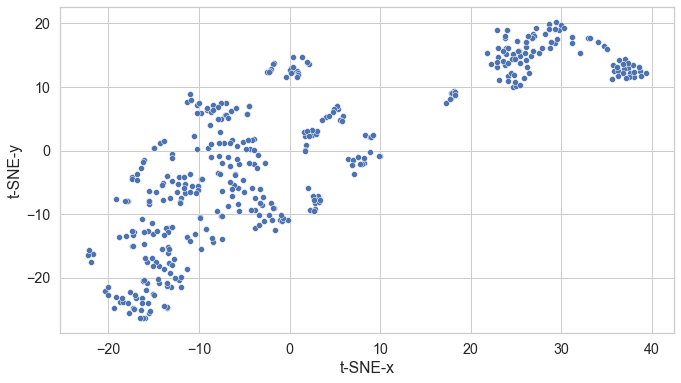

In [11]:
sns.scatterplot(data=X_train_tsne_df, x='t-SNE-x', y='t-SNE-y');

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [13]:
train_labels = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

In [14]:
X_train_tsne_df['KMeans label'] = train_labels

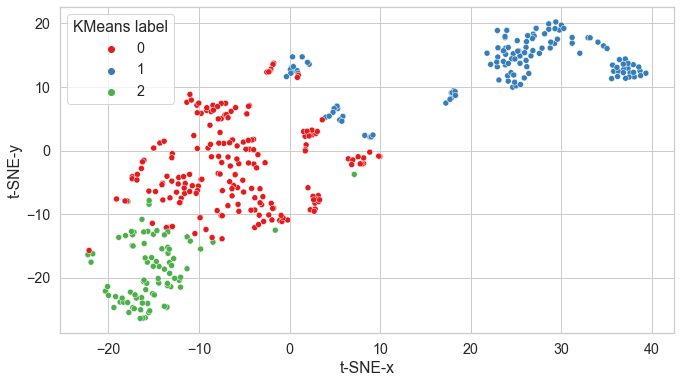

In [15]:
sns.scatterplot(data=X_train_tsne_df, x='t-SNE-x', y='t-SNE-y', hue='KMeans label', palette='Set1');

Вычислите средние значения price и CRIM в разных кластерах.

In [16]:
boston_train_df = X_train.copy()
boston_train_df['KMeans label'] = train_labels
boston_train_df['price'] = y_train['price']

In [17]:
boston_train_df.groupby('KMeans label').agg({'CRIM': np.mean, 'price': np.mean})

,CRIM,price
KMeans label,,
0,0.421660,24.958115
1,10.797028,16.165354
2,0.073566,27.788372


### Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [18]:
test_labels = kmeans.predict(X_test_scaled)

In [19]:
boston_test_df = X_test.copy()
boston_test_df['KMeans label'] = test_labels
boston_test_df['price'] = y_test['price']

In [20]:
boston_test_df.groupby('KMeans label').agg({'CRIM': np.mean, 'price': np.mean})

,CRIM,price
KMeans label,,
0,0.266079,21.860784
1,10.165531,16.437143
2,0.062060,31.350000
